In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree

In [3]:
X,y=make_classification(n_features=5,
                       n_redundant=0,
                       n_informative=5,
                       n_clusters_per_class=1)
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
df.head()

,col1,col2,col3,col4,col5,target
0,-2.348797,-0.853792,-0.567394,-0.064682,-0.439977,0
1,-0.707259,-0.952469,2.946441,-3.136452,-0.351918,0
2,-0.650780,-2.174147,1.823954,-1.300421,0.402986,0
3,-1.151586,-1.071301,1.098087,-1.472895,-1.754349,0
4,3.078948,0.333985,-0.237974,-1.233637,-1.593661,1


In [5]:
df.shape

(100, 6)

In [7]:
# we are doing column sampling 
bag=BaggingClassifier(max_features=2)
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

In [14]:
bag.estimators_

[DecisionTreeClassifier(random_state=382803131),
 DecisionTreeClassifier(random_state=1621218013),
 DecisionTreeClassifier(random_state=201657191),
 DecisionTreeClassifier(random_state=369684075),
 DecisionTreeClassifier(random_state=1599377075),
 DecisionTreeClassifier(random_state=715444044),
 DecisionTreeClassifier(random_state=1923036280),
 DecisionTreeClassifier(random_state=488916879),
 DecisionTreeClassifier(random_state=1680493909),
 DecisionTreeClassifier(random_state=1607326561)]

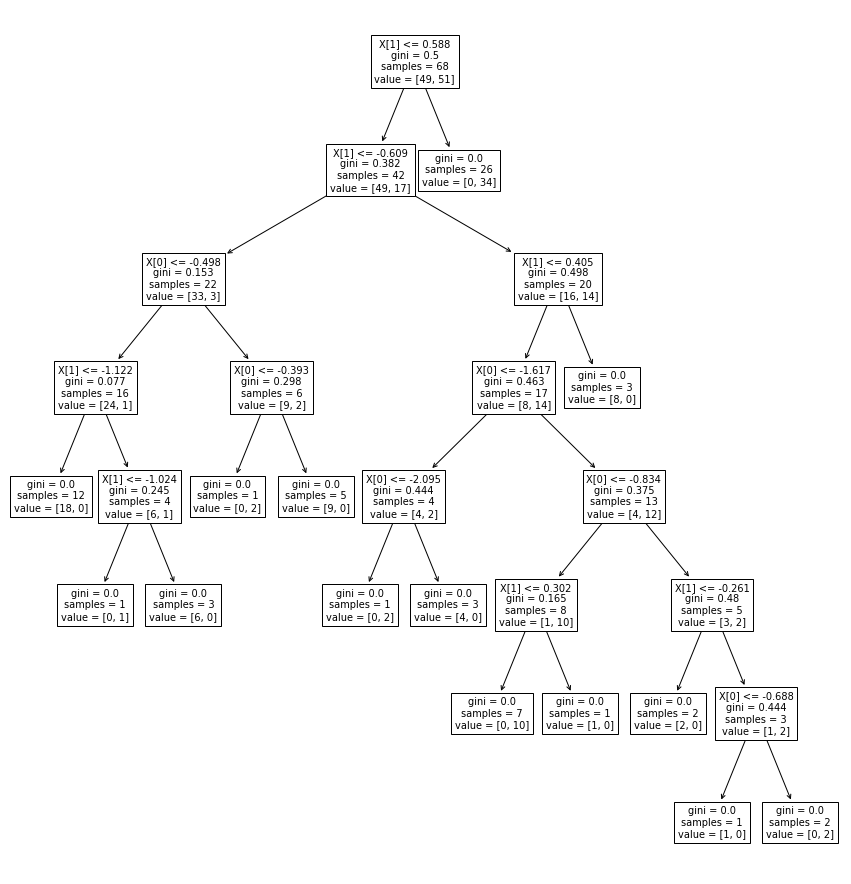

In [16]:

# In bagging at the start it has randomily picked 2 columns 
# and it will not change till the complete decision tree is formed 
# everywhere the same features will be used.

plt.figure(figsize=(15,16))
plot_tree(bag.estimators_[0])
plt.show()


In [19]:
rf=RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

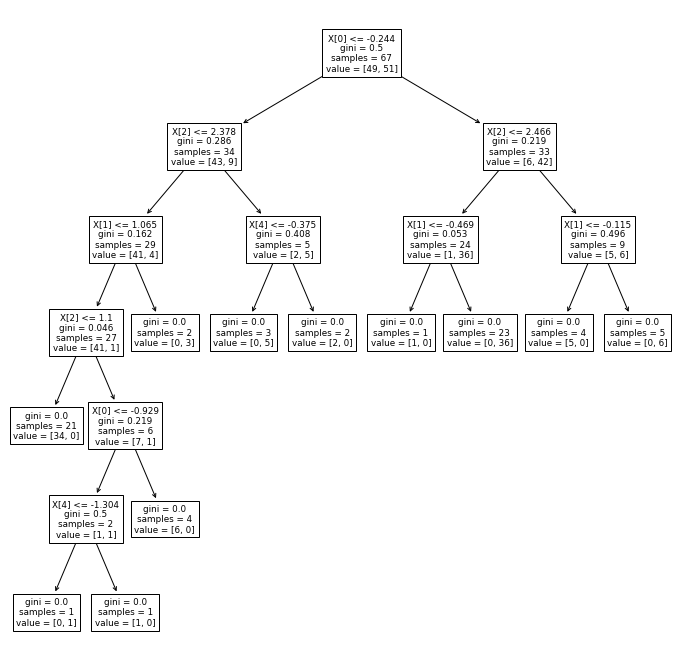

In [21]:

# Multiple features are selected randomly every time .
# Not sticked to only 2 features for the entire tree.

plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

### THE END 